In [17]:
import os, time, random
import numpy as np
import pandas as pd
import cv2, torch
from tqdm.auto import tqdm
import shutil as sh

from IPython.display import Image, clear_output
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [18]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [19]:
!pip install -q -U pycocotools

In [20]:
!pip install -q -r yolov5/requirements.txt                 #install dependencies
!cp yolov5/requirements.txt ./                             #copy file to current directory

In [21]:
img_h, img_w, num_channels = (380,676,3)         #num_channels-no. of colors in image(1-Grey, 3-color img RedGreenBlue,4RGBA)
df = pd.read_csv('../input/car-object-detection/data/train_solution_bounding_boxes (1).csv')
df.head()

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422


In [22]:
df.rename(columns={'image':'image_id'}, inplace=True)              #rename column image to image_ID
df['image_id'] = df['image_id'].apply(lambda x: x.split('.')[0])   #removes file extension from image_id
df['x_center'] = (df['xmin'] + df['xmax'])/2                       
df['y_center'] = (df['ymin'] + df['ymax'])/2
df['w'] = df['xmax'] - df['xmin']
df['h'] = df['ymax'] - df['ymin']
df['classes'] = 0
df['x_center'] = df['x_center']/img_w
df['w'] = df['w']/img_w
df['y_center'] = df['y_center']/img_h
df['h'] = df['h']/img_h
df.head()

,image_id,xmin,ymin,xmax,ymax,x_center,y_center,w,h,classes
0,vid_4_1000,281.259045,187.035071,327.727931,223.225547,0.450434,0.539817,0.068741,0.095238,0
1,vid_4_10000,15.163531,187.035071,120.329957,236.430180,0.100217,0.557191,0.155572,0.129987,0
2,vid_4_10040,239.192475,176.764801,361.968162,236.430180,0.444645,0.543678,0.181621,0.157014,0
3,vid_4_10020,496.483358,172.363256,630.020260,231.539575,0.833213,0.531451,0.197540,0.155727,0
4,vid_4_10060,16.630970,186.546010,132.558611,238.386422,0.110347,0.559122,0.171491,0.136422,0


In [23]:
index = list(set(df.image_id))              #create unique image ID as set removes duplicate values
image = random.choice(index)
print("Image ID: %s"%(image))
img = cv2.imread(f'/kaggle/input/car-object-detection/data/training_images/{image}.jpg')
                                    #functn from OpenCV library , ready img from file & returns numpy array containing pixels
img.shape

Image ID: vid_4_3820


(380, 676, 3)

Image ID: vid_4_1920


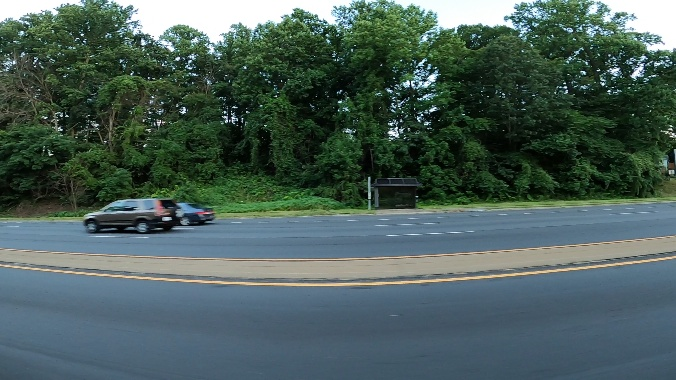

In [24]:
image = random.choice(index)
print("Image ID: %s"%(image))
Image(filename=f'/kaggle/input/car-object-detection/data/training_images/{image}.jpg',width=800)

In [26]:
!python ./yolov5/train.py --batch 2 --epochs 1 --data ../input/yolov5-config/car.yaml --cfg ../input/yolov5-config/yolov5x.yaml --name yolov5x_fold0_new

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-01-22 16:04:59.044479: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-22 16:04:59.357248: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-22 16:04:59.442306: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to regi

In [29]:
!python yolov5/detect.py --weights yolov5/yolov5s.pt --img 676 --conf 0.4 --source /kaggle/input/car-object-detection/data/testing_images

detect: weights=['yolov5/yolov5s.pt'], source=/kaggle/input/car-object-detection/data/testing_images, data=yolov5/data/coco128.yaml, imgsz=[676, 676], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-397-gde62f93c Python-3.10.12 torch-2.5.1+cu121 CPU

100%|███████████████████████████████████████| 14.1M/14.1M [00:00<00:00, 164MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING ⚠️ --img-size [676, 676] must be multiple of max stride 32, updating to [704, 704]
image 1/175 /kaggle/input/car-object-detection/data/testing_images/vid_5_25100.jpg: 416x704 (no detections), 300.4ms
image 2/175

In [30]:
predicted_files = []

for (dirpath, dirnames, filenames) in os.walk("/kaggle/working/yolov5/runs/detect/exp"):
    predicted_files.extend(filenames)
    dirnames.extend(dirnames)
    
print("Names of 5 predicted images")
predicted_files[:5]

Names of 5 predicted images


['vid_5_28000.jpg',
 'vid_5_28540.jpg',
 'vid_5_28320.jpg',
 'vid_5_28640.jpg',
 'vid_5_29060.jpg']

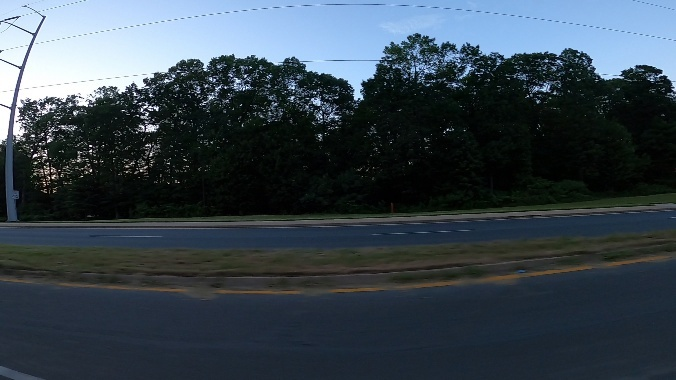

In [31]:
Image(filename = f'/kaggle/working/yolov5/runs/detect/exp/{random.choice(predicted_files)}',width=800)

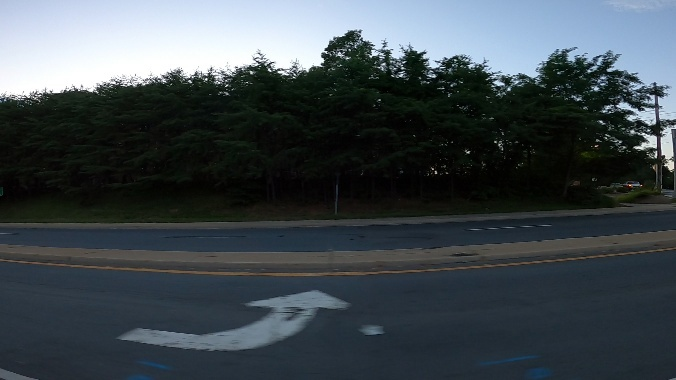

In [32]:
Image(filename = f'/kaggle/working/yolov5/runs/detect/exp/{random.choice(predicted_files)}',width=800)

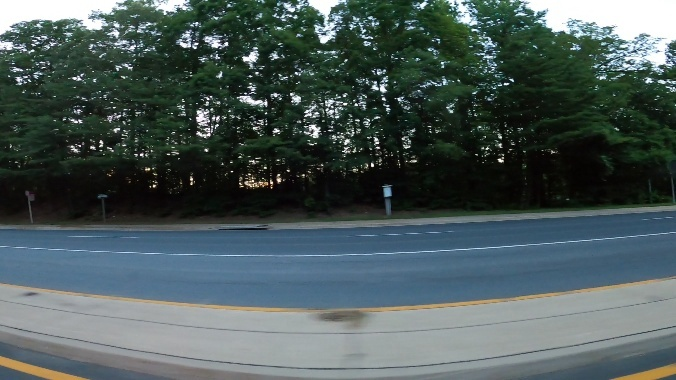

In [33]:
Image(filename = f'/kaggle/working/yolov5/runs/detect/exp/{random.choice(predicted_files)}',width=800)

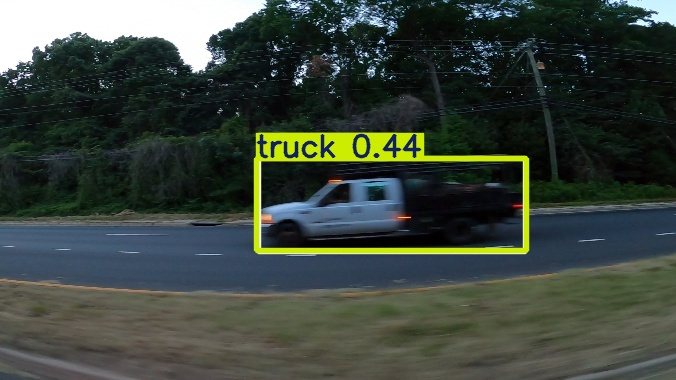

In [34]:
Image(filename = f'/kaggle/working/yolov5/runs/detect/exp/{random.choice(predicted_files)}',width=800)

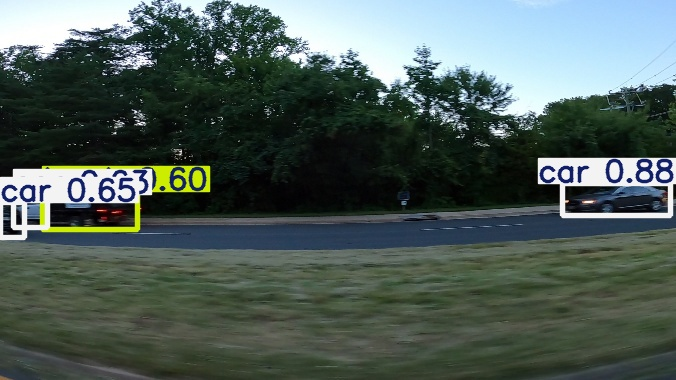

In [36]:
Image(filename = f'/kaggle/working/yolov5/runs/detect/exp/{random.choice(predicted_files)}',width=800)